In [1]:
import numpy as np
import tensorflow as tf
import mask_utils
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
def units_to_parameters_layer(mask,layer):
    if layer < 3:
        parameters = 26 * len(np.unique(np.nonzero(mask>0)[3]))
    else:
        parameters = len(np.flatnonzero(mask)) + 1
    return parameters

def units_to_parameters(masks):
    parameters = 0
    for layer in range(5):
        mask = masks[layer]
        parameters += units_to_parameters_layer(mask,layer)
    return parameters

units = {
    2 : 1370,
    4 : 19274,
    6 : 298250,
    8 : 4731914,
}

root = '../experiments/sum_of_sigmoids_regularizer/'

# Load masks from sum of sigmoids experiment

In [4]:
masks = {}
for width in [2,4,6,8]:
    masks[width] = {}
    for alpha in [1e-7,1e-6,1e-5,1e-4,1e-3]:
        masks[width][alpha] = {}
        for label in range(8):
            with open(os.path.join(root,'masks','gumbel_model_width_'+str(width)+'_iteration_0_label_'+str(label)+
                                    '_alpha_'+str(alpha)+'.pkl'),'rb') as f:
                masks[width][alpha][label] = pickle.load(f)

# Visualize distribution of mask weights for width 4, alpha 1e-4, and label 0

In [5]:
m = np.concatenate([v.reshape(-1) for v in masks[4][1e-4][0]])

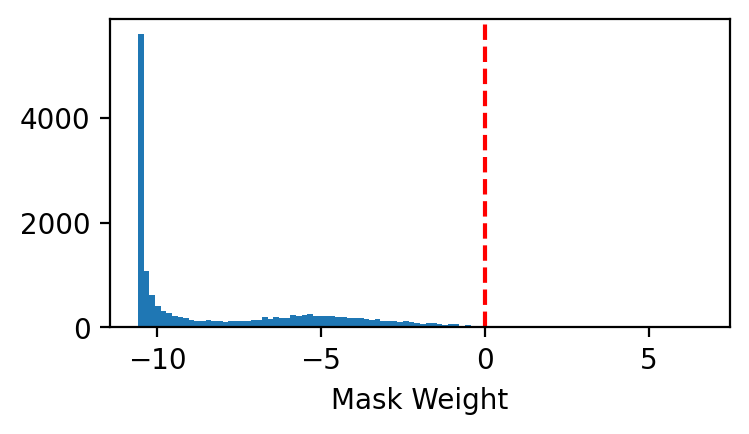

In [41]:
plt.figure(figsize=(4,2),dpi=200)
plt.hist(m,bins=100)
plt.xlabel('Mask Weight')
ylim = plt.ylim()
plt.vlines(0.,ylim[0],ylim[1],linestyle='dashed',color='red')
plt.ylim(ylim)
plt.show()

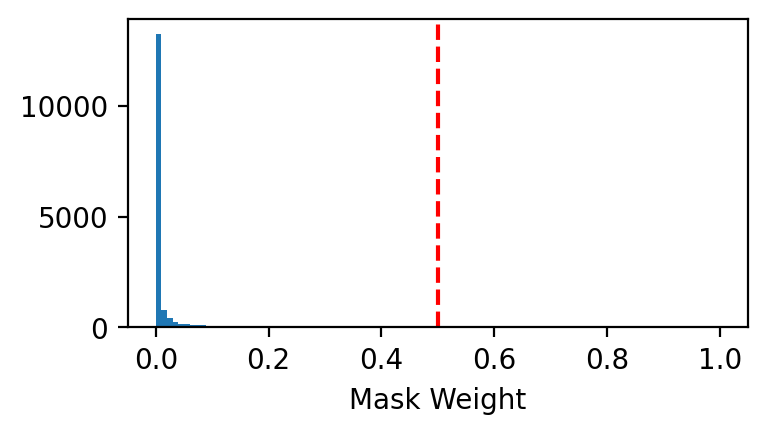

In [42]:
plt.figure(figsize=(4,2),dpi=200)
plt.hist(tf.math.sigmoid(m),bins=100)
plt.xlabel('Mask Weight')
ylim = plt.ylim()
plt.vlines(0.5,ylim[0],ylim[1],linestyle='dashed',color='red')
plt.ylim(ylim)
plt.show()

# Intersection over union

In [74]:
alpha = 1e-4
ious = {}
for width in [2,4,6,8]:
    ious[width] = {}
    for layer in range(5):
        ious[width][layer] = []
        for label1 in range(8):
            for label2 in range(8):
                if label2 > label1:
                    ious[width][layer].append(mask_utils.IOU(masks[width][alpha][label1][layer],
                                                             masks[width][alpha][label2][layer]))

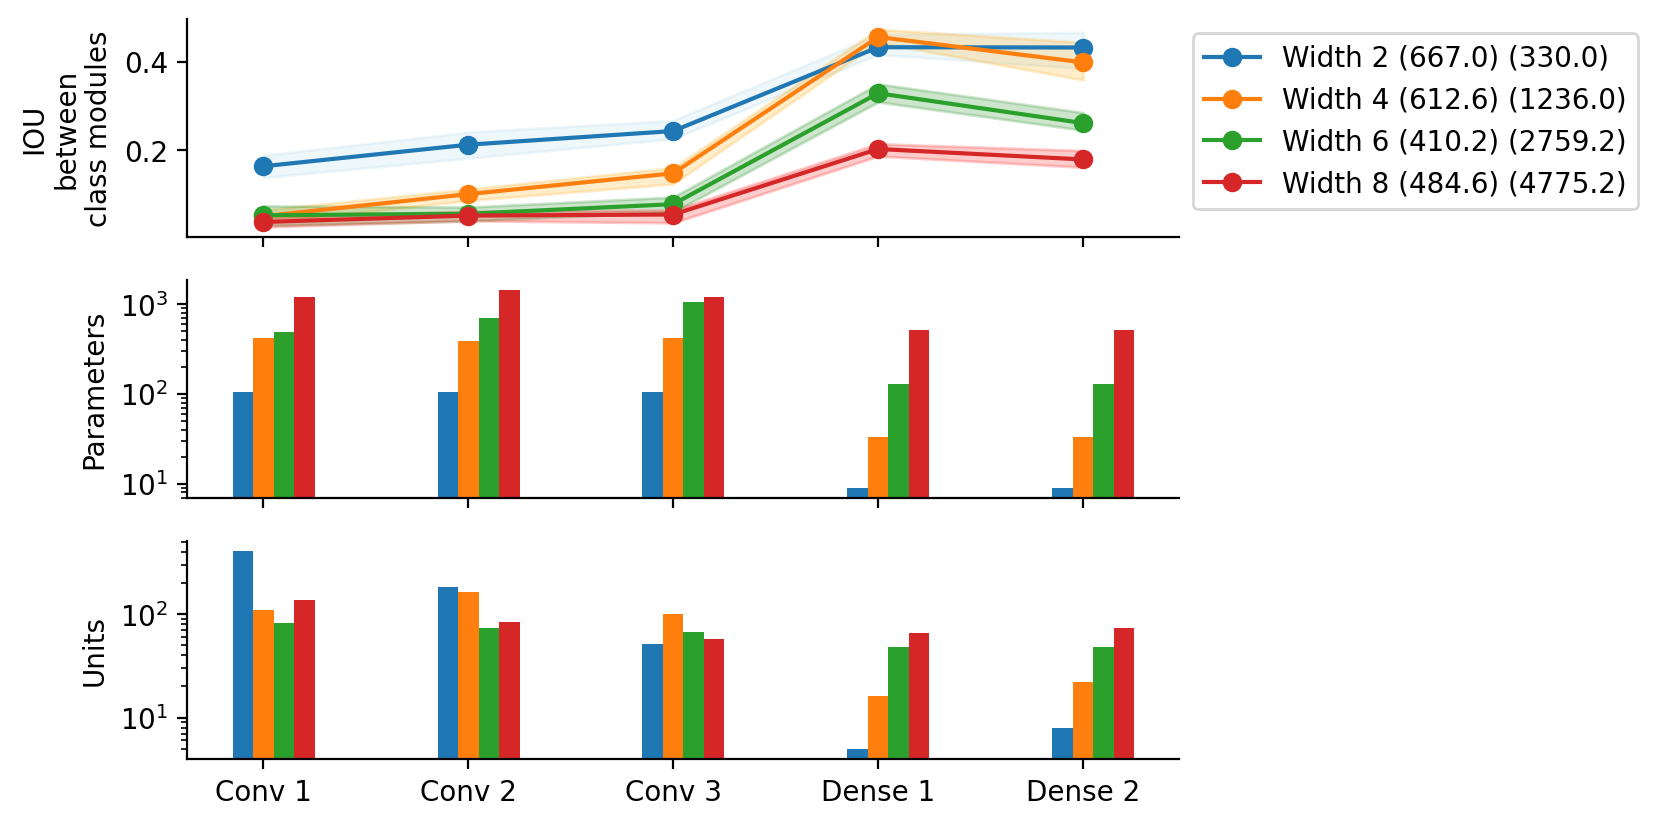

In [75]:
fig,axs = plt.subplots(3,1,dpi=200,sharex=True)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].plot(['Conv 1','Conv 2','Conv 3','Dense 1','Dense 2'],
         [np.mean(ious[2][0]),np.mean(ious[2][1]),np.mean(ious[2][2]),np.mean(ious[2][3]),np.mean(ious[2][4]),],marker='o',
           label='Width 2 ('+str(np.mean([np.sum([len(np.flatnonzero(masks[2][alpha][j][i]>0)) for i in range(5)]) for j in range(5)]))+') ('+
           str(np.mean([units_to_parameters(masks[2][alpha][i]) for i in range(5)]))+')')
axs[0].fill_between(['Conv 1','Conv 2','Conv 3','Dense 1','Dense 2'],
                 [np.quantile(ious[2][0],0.25),np.quantile(ious[2][1],0.25),np.quantile(ious[2][2],0.25),
                  np.quantile(ious[2][3],0.25),np.quantile(ious[2][4],0.25),],
                 [np.quantile(ious[2][0],0.75),np.quantile(ious[2][1],0.75),np.quantile(ious[2][2],0.75),
                  np.quantile(ious[2][3],0.75),np.quantile(ious[2][4],0.75),],
                 color='lightblue',alpha=0.2)

axs[0].plot(['Conv 1','Conv 2','Conv 3','Dense 1','Dense 2'],
         [np.mean(ious[4][0]),np.mean(ious[4][1]),np.mean(ious[4][2]),np.mean(ious[4][3]),np.mean(ious[4][4]),],marker='o',
           label='Width 4 ('+str(np.mean([np.sum([len(np.flatnonzero(masks[4][alpha][j][i]>0)) for i in range(5)]) for j in range(5)]))+') ('+
           str(np.mean([units_to_parameters(masks[4][alpha][i]) for i in range(5)]))+')')
axs[0].fill_between(['Conv 1','Conv 2','Conv 3','Dense 1','Dense 2'],
                 [np.quantile(ious[4][0],0.25),np.quantile(ious[4][1],0.25),np.quantile(ious[4][2],0.25),
                  np.quantile(ious[4][3],0.25),np.quantile(ious[4][4],0.25),],
                 [np.quantile(ious[4][0],0.75),np.quantile(ious[4][1],0.75),np.quantile(ious[4][2],0.75),
                  np.quantile(ious[4][3],0.75),np.quantile(ious[4][4],0.75),],
                 color='orange',alpha=0.2)

axs[0].plot(['Conv 1','Conv 2','Conv 3','Dense 1','Dense 2'],
         [np.mean(ious[6][0]),np.mean(ious[6][1]),np.mean(ious[6][2]),np.mean(ious[6][3]),np.mean(ious[6][4]),],marker='o',
           label='Width 6 ('+str(np.mean([np.sum([len(np.flatnonzero(masks[6][alpha][j][i]>0)) for i in range(5)]) for j in range(5)]))+') ('+
           str(np.mean([units_to_parameters(masks[6][alpha][i]) for i in range(5)]))+')')
axs[0].fill_between(['Conv 1','Conv 2','Conv 3','Dense 1','Dense 2'],
                 [np.quantile(ious[6][0],0.25),np.quantile(ious[6][1],0.25),np.quantile(ious[6][2],0.25),
                  np.quantile(ious[6][3],0.25),np.quantile(ious[6][4],0.25),],
                 [np.quantile(ious[6][0],0.75),np.quantile(ious[6][1],0.75),np.quantile(ious[6][2],0.75),
                  np.quantile(ious[6][3],0.75),np.quantile(ious[6][4],0.75),],
                 color='green',alpha=0.2)

axs[0].plot(['Conv 1','Conv 2','Conv 3','Dense 1','Dense 2'],
         [np.mean(ious[8][0]),np.mean(ious[8][1]),np.mean(ious[8][2]),np.mean(ious[8][3]),np.mean(ious[8][4]),],marker='o',
           label='Width 8 ('+str(np.mean([np.sum([len(np.flatnonzero(masks[8][alpha][j][i]>0)) for i in range(5)]) for j in range(5)]))+') ('+
           str(np.mean([units_to_parameters(masks[8][alpha][i]) for i in range(5)]))+')')
axs[0].fill_between(['Conv 1','Conv 2','Conv 3','Dense 1','Dense 2'],
                 [np.quantile(ious[8][0],0.25),np.quantile(ious[8][1],0.25),np.quantile(ious[8][2],0.25),
                  np.quantile(ious[8][3],0.25),np.quantile(ious[8][4],0.25),],
                 [np.quantile(ious[8][0],0.75),np.quantile(ious[8][1],0.75),np.quantile(ious[8][2],0.75),
                  np.quantile(ious[8][3],0.75),np.quantile(ious[8][4],0.75),],
                 color='red',alpha=0.2)
axs[0].set_ylabel('IOU\nbetween\nclass modules')
# axs[0].set_yscale('symlog')
axs[0].legend(loc='upper left',bbox_to_anchor=(1,1))

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].bar([-0.1,0.9,1.9,2.9,3.9],[units_to_parameters_layer(masks[2][alpha][0][0],0),
                        units_to_parameters_layer(masks[2][alpha][0][1],1),
                        units_to_parameters_layer(masks[2][alpha][0][2],2),
                        units_to_parameters_layer(masks[2][alpha][0][3],3),
                        units_to_parameters_layer(masks[2][alpha][0][4],4),],[0.1,0.1,0.1,0.1,0.1])
axs[1].bar([0,1,2,3,4],[units_to_parameters_layer(masks[4][alpha][0][0],0),
                        units_to_parameters_layer(masks[4][alpha][0][1],1),
                        units_to_parameters_layer(masks[4][alpha][0][2],2),
                        units_to_parameters_layer(masks[4][alpha][0][3],3),
                        units_to_parameters_layer(masks[4][alpha][0][4],4),],[0.1,0.1,0.1,0.1,0.1])
axs[1].bar([0.1,1.1,2.1,3.1,4.1],[units_to_parameters_layer(masks[6][alpha][0][0],0),
                        units_to_parameters_layer(masks[6][alpha][0][1],1),
                        units_to_parameters_layer(masks[6][alpha][0][2],2),
                        units_to_parameters_layer(masks[6][alpha][0][3],3),
                        units_to_parameters_layer(masks[6][alpha][0][4],4),],[0.1,0.1,0.1,0.1,0.1])
axs[1].bar([0.2,1.2,2.2,3.2,4.2],[units_to_parameters_layer(masks[8][alpha][0][0],0),
                        units_to_parameters_layer(masks[8][alpha][0][1],1),
                        units_to_parameters_layer(masks[8][alpha][0][2],2),
                        units_to_parameters_layer(masks[8][alpha][0][3],3),
                        units_to_parameters_layer(masks[8][alpha][0][4],4),],[0.1,0.1,0.1,0.1,0.1])
axs[1].set_ylabel('Parameters')
axs[1].set_yscale('log')

axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].bar([-0.1,0.9,1.9,2.9,3.9],[len(np.flatnonzero(masks[2][alpha][0][0]>0)),
                        len(np.flatnonzero(masks[2][alpha][0][1]>0)),
                        len(np.flatnonzero(masks[2][alpha][0][2]>0)),
                        len(np.flatnonzero(masks[2][alpha][0][3]>0)),
                        len(np.flatnonzero(masks[2][alpha][0][4]>0)),],[0.1,0.1,0.1,0.1,0.1])
axs[2].bar([0,1,2,3,4],[len(np.flatnonzero(masks[4][alpha][0][0]>0)),
                        len(np.flatnonzero(masks[4][alpha][0][1]>0)),
                        len(np.flatnonzero(masks[4][alpha][0][2]>0)),
                        len(np.flatnonzero(masks[4][alpha][0][3]>0)),
                        len(np.flatnonzero(masks[4][alpha][0][4]>0)),],[0.1,0.1,0.1,0.1,0.1])
axs[2].bar([0.1,1.1,2.1,3.1,4.1],[len(np.flatnonzero(masks[6][alpha][0][0]>0)),
                        len(np.flatnonzero(masks[6][alpha][0][1]>0)),
                        len(np.flatnonzero(masks[6][alpha][0][2]>0)),
                        len(np.flatnonzero(masks[6][alpha][0][3]>0)),
                        len(np.flatnonzero(masks[6][alpha][0][4]>0)),],[0.1,0.1,0.1,0.1,0.1])
axs[2].bar([0.2,1.2,2.2,3.2,4.2],[len(np.flatnonzero(masks[8][alpha][0][0]>0)),
                        len(np.flatnonzero(masks[8][alpha][0][1]>0)),
                        len(np.flatnonzero(masks[8][alpha][0][2]>0)),
                        len(np.flatnonzero(masks[8][alpha][0][3]>0)),
                        len(np.flatnonzero(masks[8][alpha][0][4]>0)),],[0.1,0.1,0.1,0.1,0.1])
axs[2].set_ylabel('Units')
axs[2].set_yscale('log')

# Module performance by size

In [58]:
stats = pd.read_csv(os.path.join(root,'experimental_stats.csv'),index_col=0)

In [59]:
stats

,width,iteration,label,alpha,parameters,model_loss,model_accuracy,model_auc,model_precision,model_recall,model_crossentropy,gumbel_model_loss,gumbel_model_accuracy,gumbel_model_auc,gumbel_model_precision,gumbel_model_recall,gumbel_crossentropy,units_kept,sum_of_sigmoids,gumbel_weighted_crossentropy
0,2,0,0,1.000000e-07,1370,0.048075,0.985714,0.999383,0.987718,0.984694,0.048075,0.017692,0.9947,0.999509,0.9947,0.9947,0.017349,3838,3422.66900,"(0.18568816100264973, 0.00705659568744058)"
1,2,0,0,1.000000e-06,1370,0.048075,0.985714,0.999383,0.987718,0.984694,0.048075,0.019908,0.9950,0.999522,0.9950,0.9950,0.016736,3573,3172.07150,"(0.3204018597101292, 0.005542368720722642)"
2,2,0,0,1.000000e-05,1370,0.048075,0.985714,0.999383,0.987718,0.984694,0.048075,0.045821,0.9936,0.999570,0.9936,0.9936,0.018946,3005,2687.45400,"(0.29649166602571536, 0.006998987056196871)"
3,2,0,0,1.000000e-04,1370,0.048075,0.985714,0.999383,0.987718,0.984694,0.048075,0.093533,0.9913,0.999430,0.9913,0.9913,0.024406,653,691.27460,"(0.18900899660259252, 0.012686264726659183)"
4,2,0,0,1.000000e-03,1370,0.048075,0.985714,0.999383,0.987718,0.984694,0.048075,0.204631,0.9794,0.998413,0.9794,0.9794,0.051904,128,152.72739,"(0.7053113820966225, 0.02396834431874042)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,8,0,8,1.000000e-05,4731914,0.026271,0.990760,0.999455,0.993808,0.988706,0.026271,0.144502,0.9783,0.997413,0.9783,0.9783,0.085872,3357,5862.96340,"(0.44439361709098574, 0.049416296059265154)"
193,8,0,8,1.000000e-04,4731914,0.026271,0.990760,0.999455,0.993808,0.988706,0.026271,0.142010,0.9886,0.999412,0.9886,0.9886,0.039893,668,1021.16785,"(1.0380997726640586, 0.01398478958947469)"
194,8,0,8,1.000000e-03,4731914,0.026271,0.990760,0.999455,0.993808,0.988706,0.026271,0.370899,0.9651,0.993494,0.9651,0.9651,0.140300,167,230.59897,"(3.180784805068357, 0.05172021085331981)"
195,8,0,9,1.000000e-07,4731914,0.038696,0.990089,0.998846,0.990089,0.990089,0.038696,0.031909,0.9978,0.999571,0.9978,0.9978,0.008126,264448,237826.02000,"(0.014174510022710805, 0.0015562351373523983)"


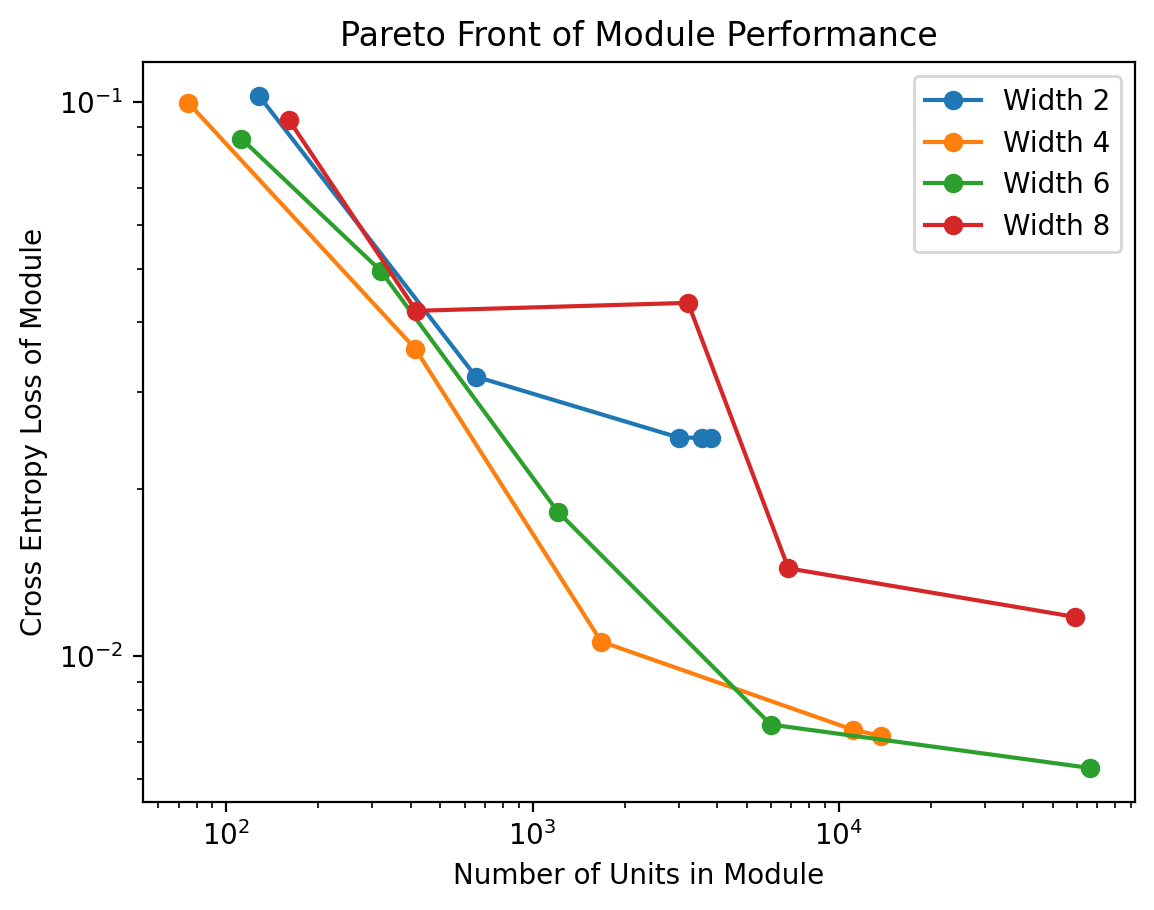

In [60]:
plt.figure(dpi=200)
w = 2
parameters = [units_to_parameters(masks[2][a][0]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
units = [np.sum([len(np.flatnonzero(masks[2][a][0][l]>0)) for l in range(5)]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
loss = [np.mean([stats[(stats['width']==w) &
      (stats['label']==l) &
      (stats['alpha']==a)]['gumbel_crossentropy'] for l in range(8)]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
plt.plot(units,loss,marker='o',label='Width 2')

w = 4
parameters = [units_to_parameters(masks[w][a][0]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
units = [np.sum([len(np.flatnonzero(masks[w][a][0][l]>0)) for l in range(5)]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
loss = [np.mean([stats[(stats['width']==w) &
      (stats['label']==l) &
      (stats['alpha']==a)]['gumbel_crossentropy'] for l in range(8)]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
plt.plot(units,loss,marker='o',label='Width 4')

w = 6
parameters = [units_to_parameters(masks[w][a][0]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
units = [np.sum([len(np.flatnonzero(masks[w][a][0][l]>0)) for l in range(5)]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
loss = [np.mean([stats[(stats['width']==w) &
      (stats['label']==l) &
      (stats['alpha']==a)]['gumbel_crossentropy'] for l in range(8)]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
plt.plot(units,loss,marker='o',label='Width 6')

w = 8
parameters = [units_to_parameters(masks[w][a][0]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
units = [np.sum([len(np.flatnonzero(masks[w][a][0][l]>0)) for l in range(5)]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
loss = [np.mean([stats[(stats['width']==w) &
      (stats['label']==l) &
      (stats['alpha']==a)]['gumbel_crossentropy'] for l in range(8) if l in [6]]) for a in [1e-7,1e-6,1e-5,1e-4,1e-3]]
plt.plot(units,loss,marker='o',label='Width 8')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Cross Entropy Loss of Module')
plt.xlabel('Number of Units in Module')
plt.title('Pareto Front of Module Performance')
plt.legend()

# Intersection over union between successive penalties

Text(0.5, 1.0, 'For width 6 networks, more agressive module unit\npenalties find new units not in modules optimized\nat previous penalty.')

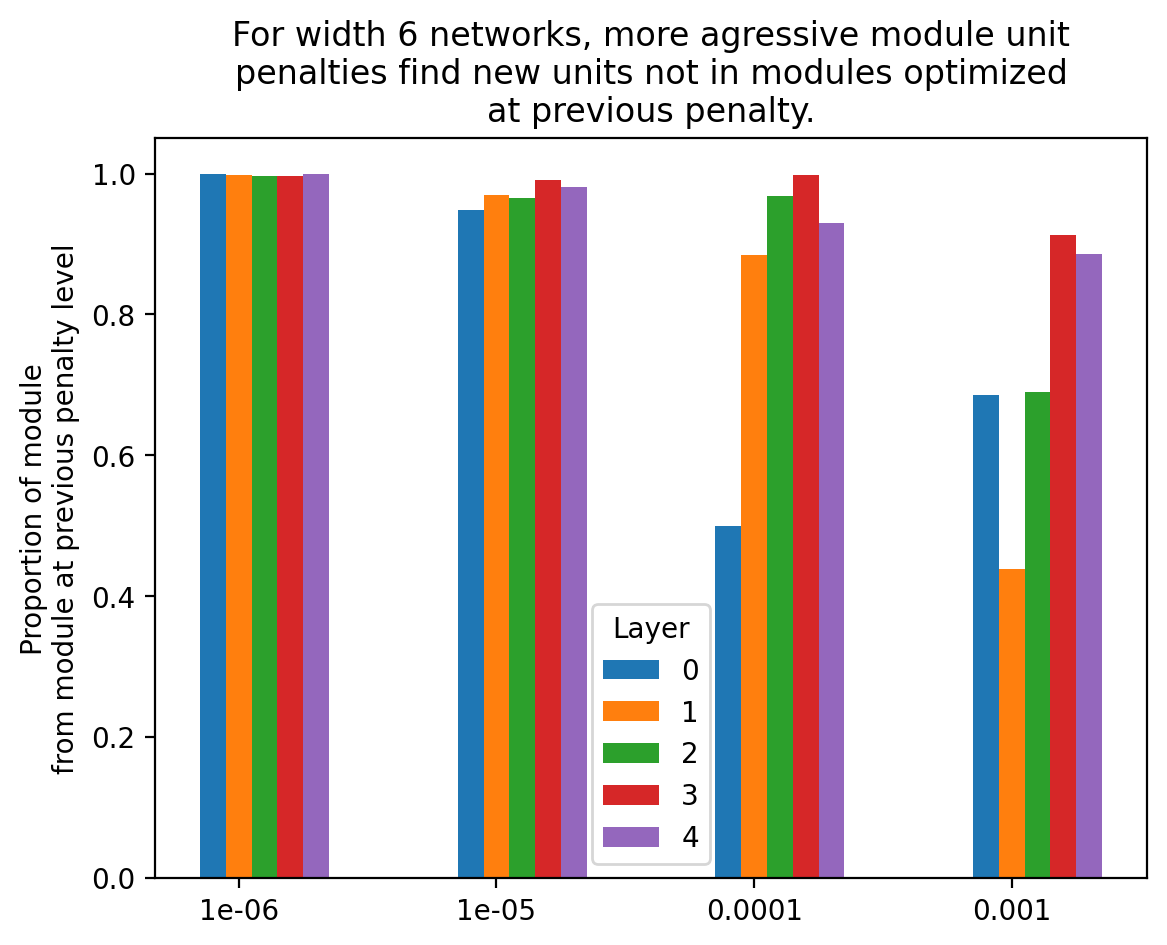

In [72]:
plt.figure(dpi=200)
w = 6
lr = 0
iobs = [np.mean([mask_utils.IOB(masks[w][list(masks[w].keys())[i-1]][lb][lr],masks[w][a][lb][lr]) for lb in range(8)]) for i,a in enumerate(masks[6].keys()) if i>0]
plt.bar([-0.1,0.9,1.9,2.9],iobs,width=0.1,label=lr)

w = 6
lr = 1
iobs = [np.mean([mask_utils.IOB(masks[w][list(masks[w].keys())[i-1]][lb][lr],masks[w][a][lb][lr]) for lb in range(8)]) for i,a in enumerate(masks[6].keys()) if i>0]
plt.bar([0,1,2,3],iobs,width=0.1,label=lr)

w = 6
lr = 2
iobs = [np.mean([mask_utils.IOB(masks[w][list(masks[w].keys())[i-1]][lb][lr],masks[w][a][lb][lr]) for lb in range(8)]) for i,a in enumerate(masks[6].keys()) if i>0]
plt.bar([0.1,1.1,2.1,3.1],iobs,width=0.1,label=lr)

w = 6
lr = 3
iobs = [np.mean([mask_utils.IOB(masks[w][list(masks[w].keys())[i-1]][lb][lr],masks[w][a][lb][lr]) for lb in range(8)]) for i,a in enumerate(masks[6].keys()) if i>0]
plt.bar([0.2,1.2,2.2,3.2],iobs,width=0.1,label=lr)

w = 6
lr = 4
iobs = [np.mean([mask_utils.IOB(masks[w][list(masks[w].keys())[i-1]][lb][lr],masks[w][a][lb][lr]) for lb in range(8)]) for i,a in enumerate(masks[6].keys()) if i>0]
plt.bar([0.3,1.3,2.3,3.3],iobs,width=0.1,label=lr)

plt.xticks([0,1,2,3],list(masks[w].keys())[1:])
plt.ylabel('Proportion of module\nfrom module at previous penalty level')
plt.legend(title='Layer')
plt.title('For width 6 networks, more agressive module unit\npenalties find new units not in modules optimized\nat previous penalty.')


# Selectivity of module units

In [12]:
model = tf.keras.models.load_model(os.path.join(root,'models','model_width_6_iteration_0'))

In [13]:
model.summary()

Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_6 (ZeroPaddi  (None, 32, 32, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 zero_padding2d_7 (ZeroPaddi  (None, 18, 18, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        102464    
                                                    

In [14]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
y_train_identities,y_test_identities = y_train,y_test

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.0234 - accuracy: 0.9925 - auc: 0.9996 - precision: 0.9932 - recall: 0.9921 - categorical_crossentropy: 0.0234


[0.023354358971118927,
 0.9925000071525574,
 0.9995811581611633,
 0.9931924939155579,
 0.9921000003814697,
 0.023354358971118927]

In [16]:
activations = {}
for i,layer_idx in enumerate([1,4,7,10,11]):
    spliced_model = tf.keras.Model(inputs=model.inputs,outputs=model.layers[layer_idx].output)
    activations[i] = spliced_model.predict(x_test)

In [17]:
selective_magnitudes = {}
for i in range(5):
    selective_magnitudes[i] = np.divide(np.matmul(y_test.T,activations[i].reshape(10000,-1)),
                                        np.sum(y_test,axis=0).reshape(10,1))

In [18]:
selectivities = {}
for i in range(5):
    selectivities[i] = np.nan_to_num(selective_magnitudes[i] / np.mean(selective_magnitudes[i],axis=0))

/var/folders/kx/nk5c3ls10_350gkg_5018b_rbpp8nh/T/ipykernel_31215/2029769393.py:3: RuntimeWarning: invalid value encountered in divide
  selectivities[i] = np.nan_to_num(selective_magnitudes[i] / np.mean(selective_magnitudes[i],axis=0))


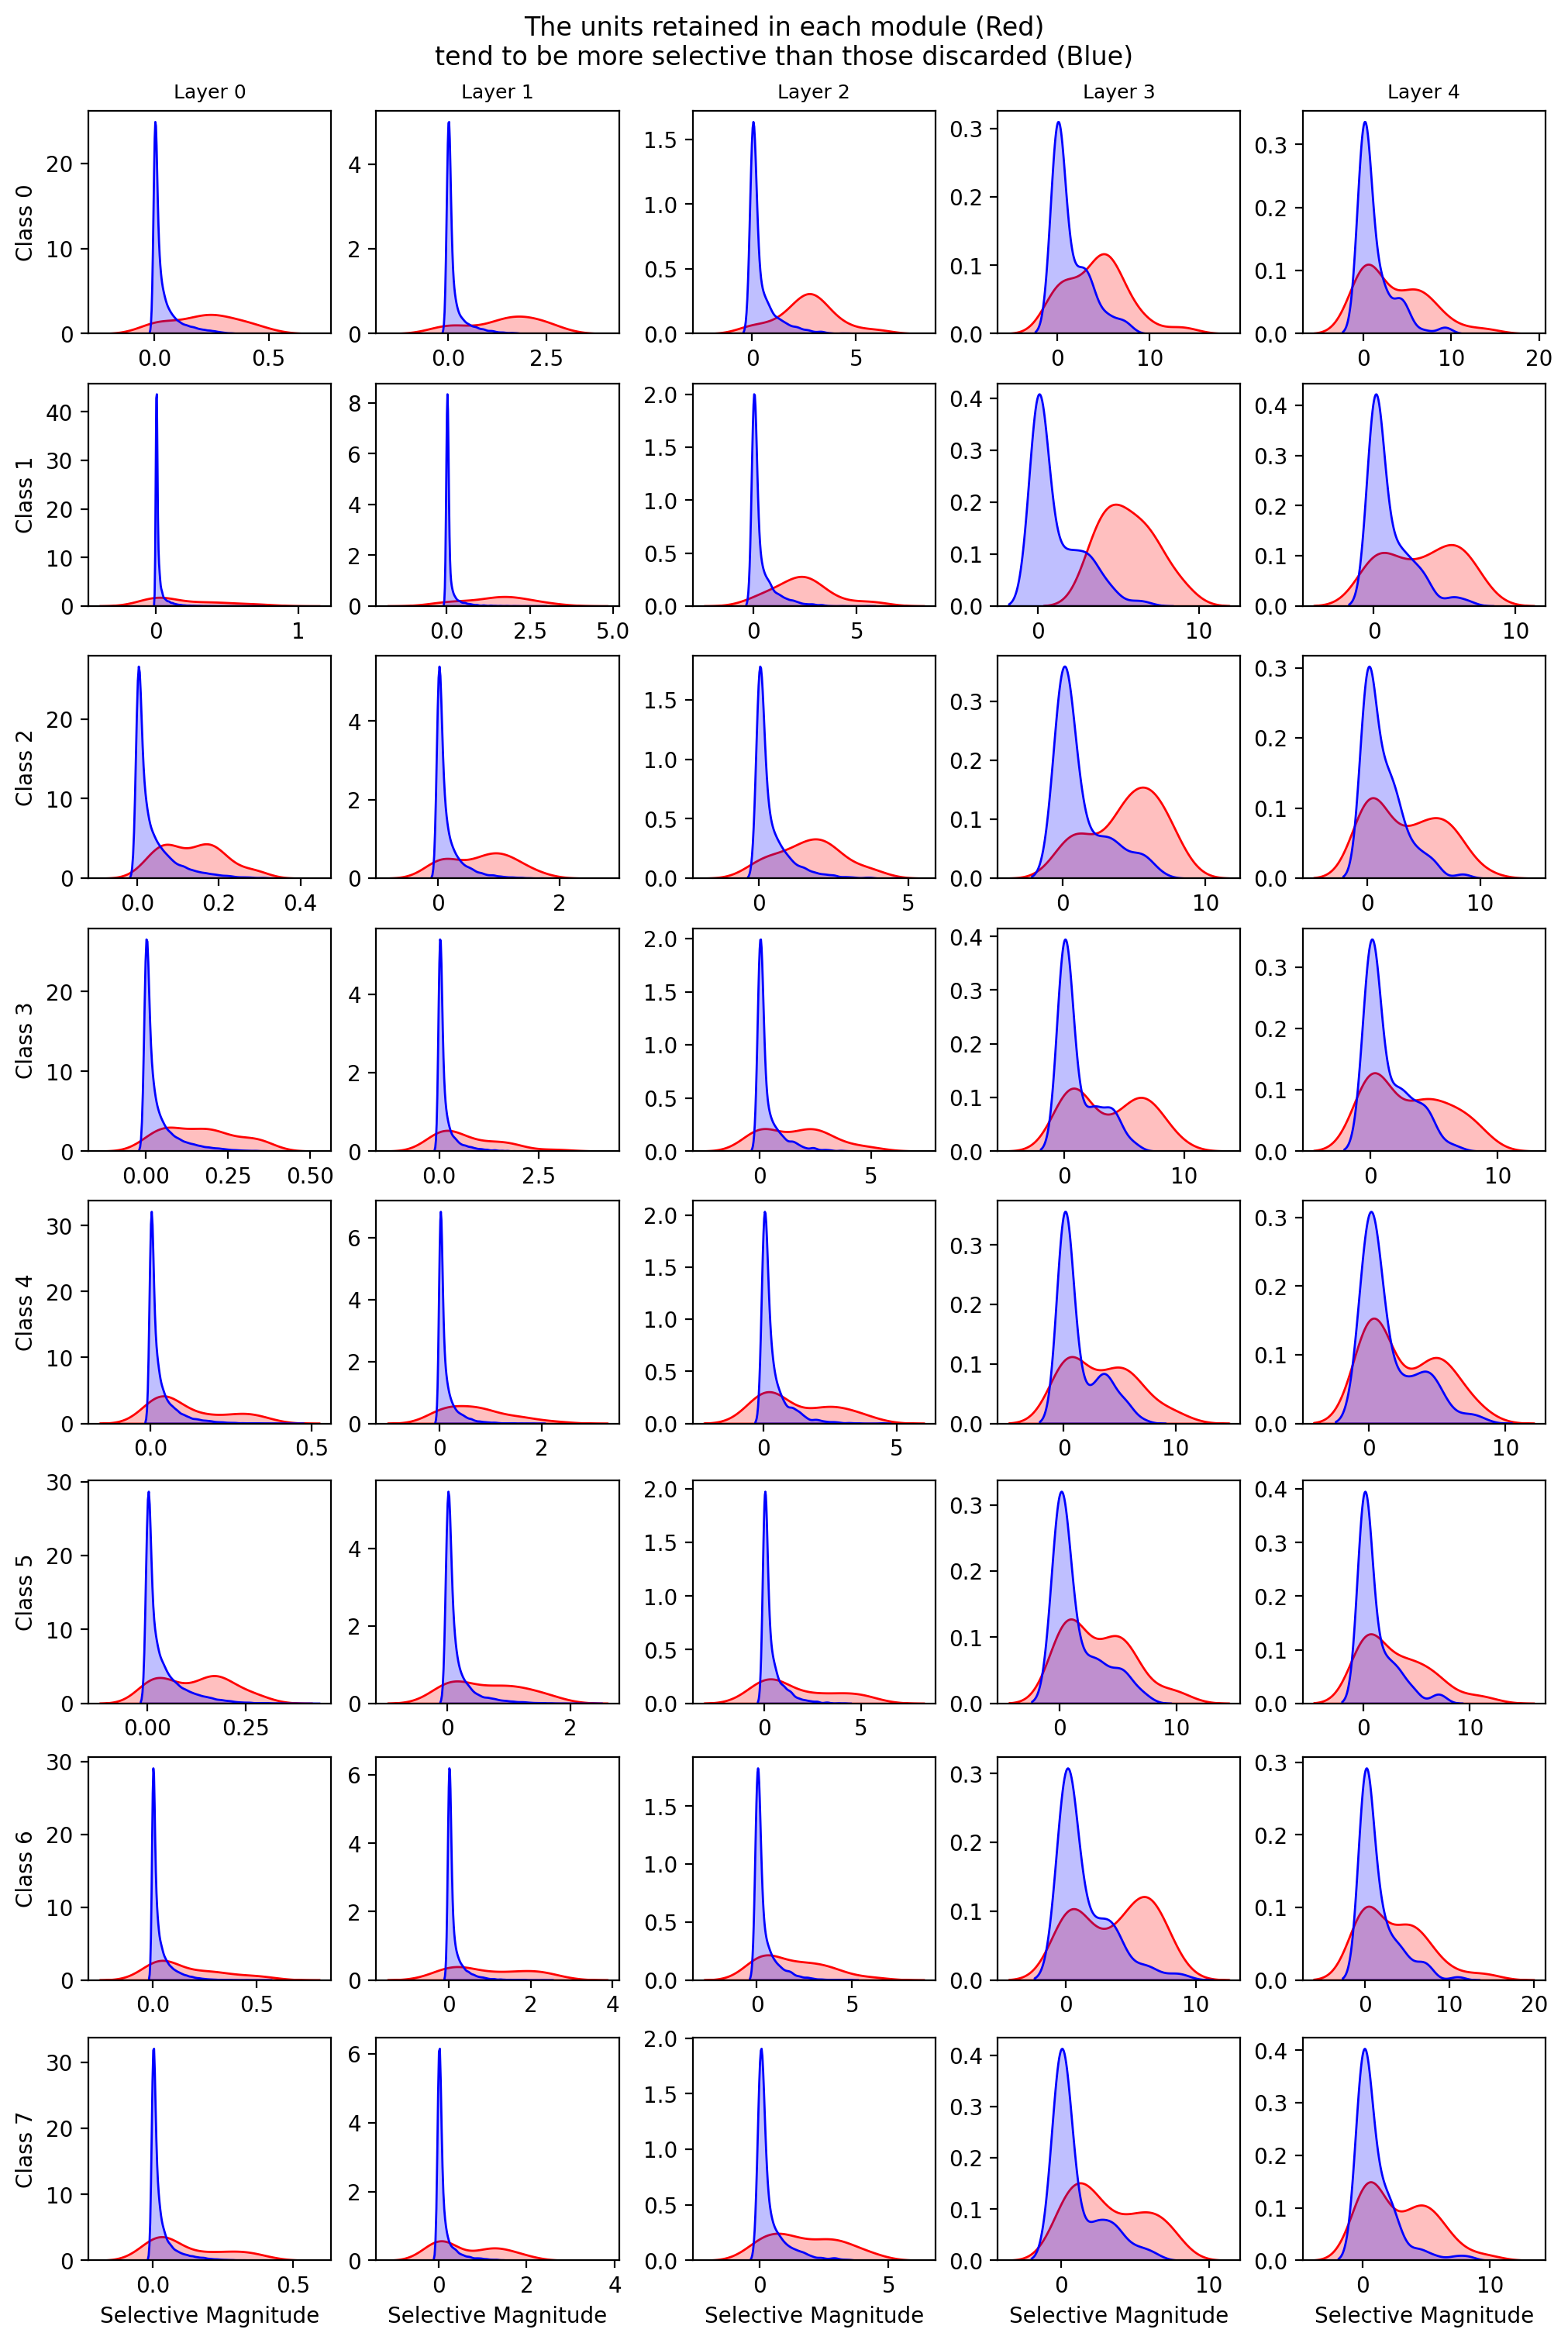

In [22]:
alpha = 1e-3
width = 6
fig,axs = plt.subplots(8,5,figsize=(10,15),dpi=200,constrained_layout=True)
for label in range(8):
    for layer in range(5):
        ax = axs[label,layer]
        sns.kdeplot(selective_magnitudes[layer][label][np.flatnonzero(masks[width][alpha][label][layer] > 0)],
                    ax=ax,fill=True,color='r')
        sns.kdeplot(selective_magnitudes[layer][label][np.flatnonzero(masks[width][alpha][label][layer] <= 0)],
                    ax=ax,fill=True,color='b')
        if layer == 0:
            ax.set_ylabel('Class '+str(label))
        else:
            ax.set_ylabel('')
        if label == 0:
            ax.set_title('Layer '+str(layer),fontsize=9)
        if label == 7:
            ax.set_xlabel('Selective Magnitude')
fig.suptitle('The units retained in each module (Red)\ntend to be more selective than those discarded (Blue)')
plt.show()

# Visualizing Modules

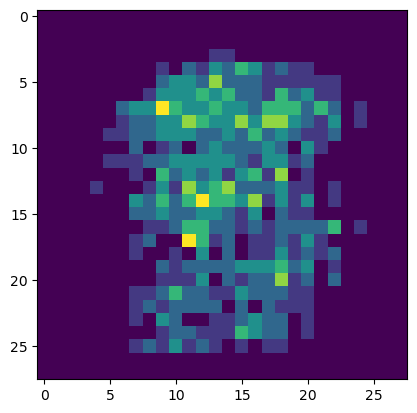

In [39]:
width = 6
alpha = 1e-6
filters = np.zeros((28,28))
for i in range(8):
    filters += np.where(masks[width][alpha][i][0][0,:,:,0]>0.,1,0)
plt.imshow(filters)

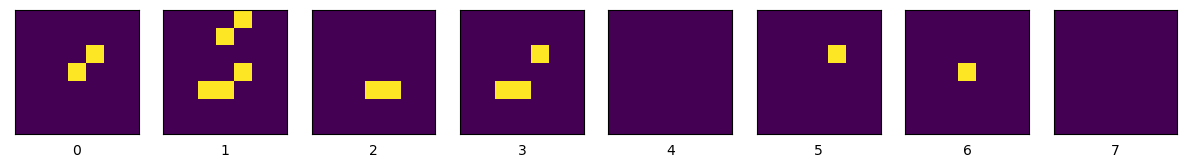

In [37]:
width = 6
alpha = 1e-4
fig,ax = plt.subplots(1,8,figsize=(15,5))
for i in range(8):
    ax[i].imshow(np.where(masks[width][alpha][i][2][0,:,:,0]>0.,1,0))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel(str(i))